**Great job completing your first Machine Learning classification task in Lab 3.**

In this lab, we will work on something that we have been studying in this FEM Training so far. We will be working with a regression problem. Remember linear regression? We will try to implement something similar but using Deep Neural Network. Hope you are excited about this!

The problem we are working with is a 3 sensor 1D bar problem. Let's talk a bit about linear regression. In the linear regression problem from homework 20 and 21, we tried to predict the Young's Modulus *'E'* values using displacement *'u'* values.

We will do something similar. We will train our model using the displacement *u* values to try to predict the corresponding *E* values. We will dive deeper into how the data looks like and how we feed it into the model.

**Problem Statement**

Use Deep Neural Network to tackle the following problem.


Let us consider that we discretize the domain of the following bar by using 10 elements for all of the above cases. We also consider to use not only the nodes between the both ends but also those at the both ends. That is, for 10 elements, we will use 11 node points. This discretization will lead to 11-by-11 K (stiffness) matrix and 11-by-1 F (force) vector before we tailor them. You have already done this in MATLAB in homework 17.

For computations, use the following values: L = 10 m, P0 = 100 N/m, E = 10^9 N/m2, A = 0.01 m2, and f = 1000 N.
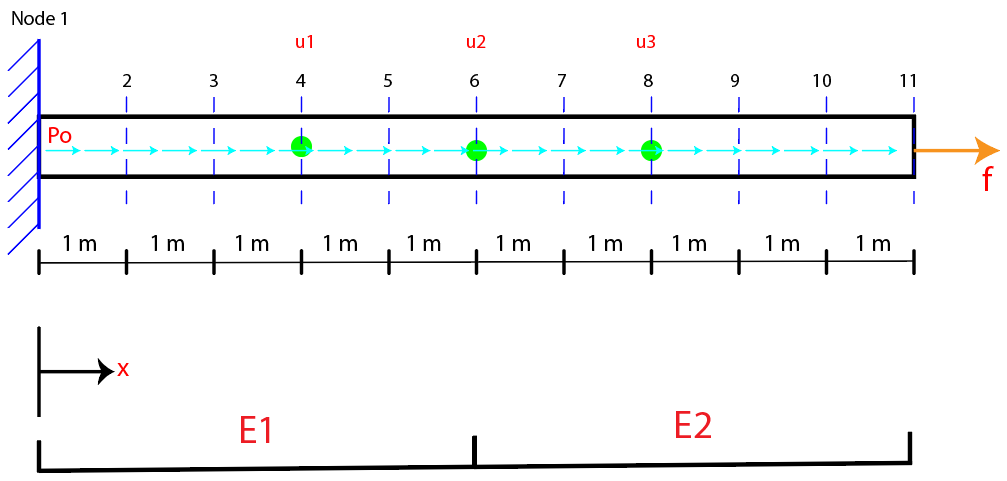

##Import Libraries and Dataset

Let's start by importing the needed libraries and dataset.

In [ ]:
import pandas as pd #Used to read data from excel files
import numpy as np #Used for numerical computations

#Training and test dataset links

traindataLink = 'https://github.com/shashhhw/SWIMLabML/blob/main/Datasets/Lab%204:%201D%203Sensor%20Dataset/trainingData.xlsx?raw=true'
testdataLink = 'https://github.com/shashhhw/SWIMLabML/blob/main/Datasets/Lab%204:%201D%203Sensor%20Dataset/testData.xlsx?raw=true'

#Read values from the excel file in those links, convert them to...
#numpy arrays and store them in train_data and test_data variable

train_data = np.array(pd.read_excel(traindataLink))
test_data = np.array(pd.read_excel(testdataLink))

Let's see how the data looks like.



In [ ]:
#Prints out the number of training and test examples...
#and the number of values in each example

print(train_data.shape)
print(test_data.shape)

This shows that the training data has 15999 training examples and the test dataset has 2999 values.

The data in excel file looks like this.

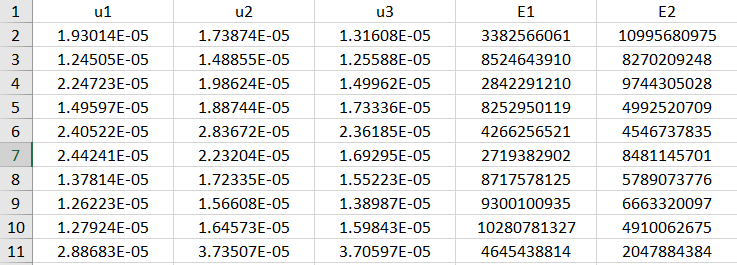

We can clearly see that the first example has 5 categories of data in a single training example. The above image only shows the first 11 examples of the 15999 training datasets present in the excel file. The first column contains u1 values, second u2 values, third contains u3 values, fourth column consists of E1, and the fifth column consists of E2 values.

Here u1, u2, u3 are **input** values that we will feed into the model. E1 and E2 values are out so-called **targets**. Basically, we will try to predict E1 and E2 values using u1, u2, and u3 values. It makes sense for us to call E1 and E2 as targets rather than classes or labels because we don't have a fix *class* or *label* for the dataset. Rather using the u values we "target" to predict E1 and E2.

In the next cell, we will assign the column values to specific variable names.

Sidenote: Remember that indexing in Python starts from 0 and not 1 like MATLAB. So, to access the 1st column you would need to access the 0th column.

In [ ]:
#Assign all training examples and first column values to u1_train variable
u1_train = train_data[:, 0]

#Assign all training examples and second column values to u2_train variable
u2_train = train_data[:, 1]

#Assign all training examples and third column values to u3_train variable
u3_train = train_data[:, 2]

#Assign all training examples and fourth column values to E1_train variable
E1_train = train_data[:, 3]

#Assign all training examples and fifth column values to E2_train variable
E2_train = train_data[:, 4]

Do the same with test dataset as well. Assign them to u1_test, u2_test,... and likewise.

In [ ]:
u1_test = test_data[:, 0]
u2_test = test_data[:, 1]
u3_test = test_data[:, 2]

E1_test = test_data[:, 3]
E2_test = test_data[:, 4]

##Data-preprocessing

Remember how we divided the image pixel values by 255 to bring the pixel range from 0-255 to 0-1. We will do something similar with our dataset as well.

We will use the standard z-score normalizing method to bring the u values to a certain range. The way u-values will be changed is the following.

u1 = (u1 - mean of u1) / (highest u1 value - lowest u1 value)

u2 = (u2 - mean of u2) / (highest u2 value - lowest u2 value)

u3 = (u3 - mean of u3) / (highest u3 value - lowest u3 value)

Similarly, we will normalize E1 and E2 using the same concept so that our range of **input** data and the **targets** are almost between 0-1 so that the model converges better and faster with better results.

Let's see the range of values that our u1, u2, and u3, E1, and E2 values we initially had.


In [ ]:
print("u1 values range from %f to %f" %(np.min(u1_train), np.max(u1_train)))
print("u2 values range from %f to %f" %(np.min(u2_train), np.max(u2_train)))
print("u3 values range from %f to %f" %(np.min(u3_train), np.max(u3_train)))

print("")

print("E1 values range from %0.5f*1e9 to %0.5f*1e9" %(np.min(E1_train)/1e9, np.max(E1_train)/1e9))
print("E2 values range from %0.5f*1e9 to %0.5f*1e9" %(np.min(E2_train)/1e9, np.max(E2_train)/1e9))

E1 and E2 values definitely has a huge range, huh!

Let's normalize the u and E values to bring them closer to something that is between 0 and 1.

Since we will be repeating the normalizing functionality to multiple variables, it makes sense to define a function in Python. We will learn about defining one later but try to understand how we calculate the mean and range values using numpy to normalize the dataset. 

In [ ]:
#We define global variables to make it possible for us to use it anywhere in our Colab file
global u1_train_mean, u2_train_mean, u3_train_mean, E1_train_mean, E2_train_mean
global u1_train_range, u2_train_range, u3_train_range, E1_train_range, E2_train_range

#Using numpy to calculate mean
u1_train_mean = np.mean(u1_train)
#Using numpy to calculate range
u1_train_range = np.max(u1_train)-np.min(u1_train)

#Similar with rest
u2_train_mean = np.mean(u2_train)
u2_train_range = np.max(u2_train)-np.min(u2_train)

u3_train_mean = np.mean(u3_train)
u3_train_range = np.max(u3_train)-np.min(u3_train)

#Do the same with E1 and E2 values as well
E1_train_mean = np.mean(E1_train)
E1_train_range = np.max(E1_train)-np.min(E1_train)

E2_train_mean = np.mean(E2_train)
E2_train_range = np.max(E2_train)-np.min(E2_train)

In [ ]:
def normalize(u1, u2, u3, E1, E2):
  u1 = (u1 - u1_train_mean)/u1_train_range
  u2 = (u2 - u2_train_mean)/u2_train_range
  u3 = (u3 - u3_train_mean)/u3_train_range

  E1 = (E1 - E1_train_mean)/E1_train_range
  E2 = (E2 - E2_train_mean)/E2_train_range

  return u1, u2, u3, E1, E2

Use the defined function to normalize.

In [ ]:
#Normalizes the variables u1_train, u2_train, u3_train, E1_train, and E2_train
u1_train, u2_train, u3_train, E1_train, E2_train = normalize(u1_train, u2_train, u3_train, E1_train, E2_train)

#Normalizes the test set as well
u1_test, u2_test, u3_test, E1_test, E2_test = normalize(u1_test, u2_test, u3_test, E1_test, E2_test)

Now, let's see the range of values of u and E. Notice how the u and E values are almost similar range!

In [ ]:
print("u1 values range from %f to %f" %(np.min(u1_train), np.max(u1_train)))
print("u2 values range from %f to %f" %(np.min(u2_train), np.max(u2_train)))
print("u3 values range from %f to %f" %(np.min(u3_train), np.max(u3_train)))

print("")

print("E1 values range from %0.5f to %0.5f" %(np.min(E1_train), np.max(E1_train)))
print("E2 values range from %0.5f to %0.5f" %(np.min(E2_train), np.max(E2_train)))

Now, we are done with the hard part (what I like to believe). Let's arrange the different variables such that we can actually feed it into the model. We will stack the u1, u2, and u3 values column wise such that they align something like.

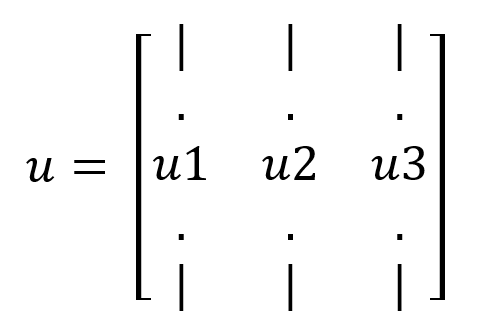

Similarly, we will also stack the E1 and E2 values column wise to appear something like.

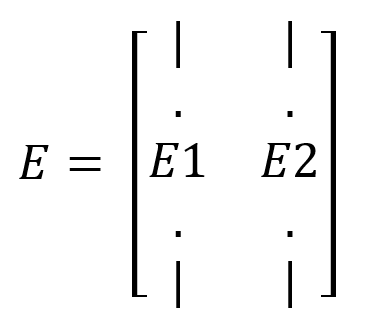

In [ ]:
u_train = np.dstack((u1_train, u2_train, u3_train)).squeeze()
u_test = np.dstack((u1_test, u2_test, u3_test)).squeeze()

E_train = np.dstack((E1_train, E2_train)).squeeze()
E_test = np.dstack((E1_test, E2_test)).squeeze()

So, after after doing this, how does our input and target array shape up. Let's observe that.

In [ ]:
print('Before stacking the u values, the shapes were:')
print('Shape of u1', np.shape(u1_train))
print('Shape of u2', np.shape(u2_train))
print('Shape of u3', np.shape(u3_train))

print("")
print('After stacking the u values, the shape of the u-input variable is:')
print('Shape of u', np.shape(u_train))

If you try to implement the similar with E1 and E2 then you will get the final shape of E stacked variable as (15999, 2).

Promise we are done with the boring part. Let's actually do some machine learning!

Useful Links:

[Activation Functions](https://keras.io/api/layers/activations/)

[Optimizers](https://keras.io/api/optimizers/)

In [ ]:
from keras import models, layers

#Like always, import a sequential model
model = models.Sequential()

#First input layer
model.add(layers.InputLayer((u_train.shape[1])))

#3 Hidden Dense
model.add(layers.Dense(16, activation = 'elu'))
model.add(layers.Dense(16, activation = 'elu'))
model.add(layers.Dense(32, activation = 'elu'))

#Output Layer
#We have two nodes at the output because we need to predict E1 and E2.
#If you needed to predict just E1, then the final node would be 1.

model.add(layers.Dense(2))
#Compile using mae as loss function and mse as the judging how good the model is performing
model.compile(optimizer = 'nadam', loss = 'mae', metrics = 'mse')

#The history variable stores the information from training
history = model.fit(u_train, E_train,  epochs = 20, batch_size = 15)

#See how it performs on the test dataset
print("Test:")
model.evaluate(u_test, E_test)
model.summary()

Let's say you get a loss of 0.004, which is great! To make sense of this, think of it as if you need to predict
E1 = 8.625 * 1e9 N/m2 but you predict E1 = 8.621 * 1e9 or 8.629 * 1e9. It varies by roughly <u>+</u> 0.04, is the main point!

Let's see it in action where the values actually makes more sense. We calculate the percent difference of the actual value and the value we are predicting using the model.

In [ ]:
testdataLink = 'https://github.com/shashhhw/SWIMLabML/blob/main/Datasets/Lab%204:%201D%203Sensor%20Dataset/testData.xlsx?raw=true'

test_data = np.array(pd.read_excel(testdataLink))

Want to see how it does on a different example, just change the test_num variable value from anything between 0-2999 and see it for yourself.

In [ ]:
test_num = 584
u1_test = test_data[test_num, 0]
u2_test = test_data[test_num, 1]
u3_test = test_data[test_num, 2]

E1_test = test_data[test_num, 3]
E2_test = test_data[test_num, 4]

In [ ]:
u1_test, u2_test, u3_test, E1_test, E2_test = normalize(u1_test, u2_test, u3_test, E1_test, E2_test)

u_test = np.dstack((u1_test, u2_test, u3_test)).squeeze()

In [ ]:
u_test = u_test.reshape((1, 3))

E_pred = model.predict(u_test)

In [ ]:
E1_pred = E_pred[0, 0]
E2_pred = E_pred[0, 1]

In [ ]:
E1_pred = E1_pred * E1_train_range + E1_train_mean
E2_pred = E2_pred * E2_train_range + E2_train_mean

In [ ]:
print("E1 prediction: %f and E2 prediction: %f" %(E1_pred, E2_pred))

In [ ]:
E1_test = E1_test * E1_train_range + E1_train_mean
E2_test = E2_test * E2_train_range + E2_train_mean

print("Actual E1 value: %f N/m2 and Actual E2 value: %f N/m2" %(E1_test, E2_test))

In [ ]:
error1 = abs((E1_pred - E1_test)/E1_test*100)
error2 = abs((E2_pred - E2_test)/E2_test*100)

print("Error in prediction of E1: %0.2f N/m2 percent" %error1)
print("Error in prediction of E2: %0.2f N/m2 percent" %error2)

print("")

print("An error of %0.2f and %0.2f not bad, aye?" %(error1, error2))

Definitely better than Linear Regression. Try changing the test_num value and see how it differs on multiple test datasets. Hope you enjoyed this, and work similarly to work on Lab 5 which involves 4 sensors and 4 E predictions.